In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot,lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('Microsoft_Stock.csv',parse_dates = ['Date'],index_col='Date')
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455


In [3]:
df.index

DatetimeIndex(['2015-04-01 16:00:00', '2015-04-02 16:00:00',
               '2015-04-06 16:00:00', '2015-04-07 16:00:00',
               '2015-04-08 16:00:00', '2015-04-09 16:00:00',
               '2015-04-10 16:00:00', '2015-04-13 16:00:00',
               '2015-04-14 16:00:00', '2015-04-15 16:00:00',
               ...
               '2021-03-18 16:00:00', '2021-03-19 16:00:00',
               '2021-03-22 16:00:00', '2021-03-23 16:00:00',
               '2021-03-24 16:00:00', '2021-03-25 16:00:00',
               '2021-03-26 16:00:00', '2021-03-29 16:00:00',
               '2021-03-30 16:00:00', '2021-03-31 16:00:00'],
              dtype='datetime64[ns]', name='Date', length=1511, freq=None)

In [5]:
df['7_day_MA'] = df['Close'].rolling(window = 7).mean()
df

,Open,High,Low,Close,Volume,7_day_MA
Date,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,NaN
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,NaN
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,NaN
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,NaN
...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,234.211429
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,234.131429
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,234.777143


In [6]:
df['fluctuation'] = df['Close'].pct_change()
df

,Open,High,Low,Close,Volume,7_day_MA,fluctuation
Date,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,NaN,-0.010560
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,NaN,0.031273
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,NaN,-0.000481
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,NaN,-0.002649
...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,234.211429,-0.013251
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,234.131429,0.017819
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,234.777143,-0.005244


[]

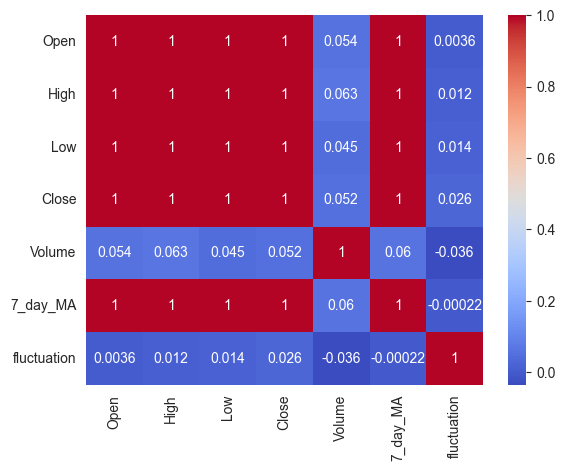

In [12]:
sns.heatmap(df.corr(),cmap = 'coolwarm',annot = True)
plt.plot()

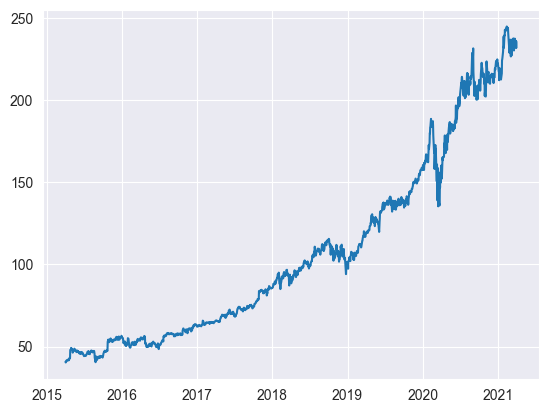

In [13]:
plt.plot(df['Close'])

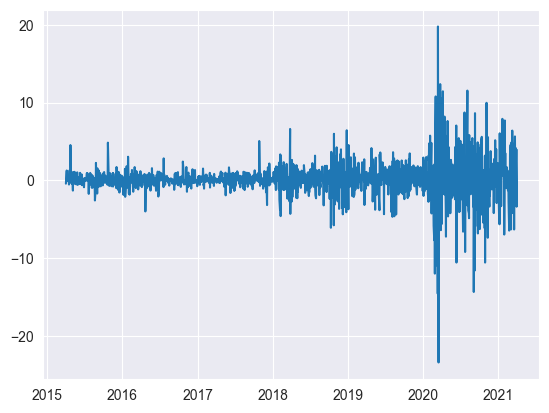

In [14]:
plt.plot(df['Close'].diff())

In [16]:
df.resample('D').mean()

,Open,High,Low,Close,Volume,7_day_MA,fluctuation
Date,,,,,,,
2015-04-01,40.60,40.76,40.31,40.72,36865322.0,NaN,NaN
2015-04-02,40.66,40.74,40.12,40.29,37487476.0,NaN,-0.010560
2015-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-29,236.59,236.80,231.88,235.24,25227455.0,234.777143,-0.005244


In [17]:
df.resample('Y').mean()

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_15765/4181768894.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').mean()


,Open,High,Low,Close,Volume,7_day_MA,fluctuation
Date,,,,,,,
2015-12-31,47.650157,48.168168,47.241466,47.729476,3.487185e+07,47.704857,0.001782
2016-12-31,55.230516,55.677460,54.782381,55.259325,3.100403e+07,55.177959,0.000552
2017-12-31,71.953506,72.376215,71.498127,71.984024,2.243791e+07,71.711838,0.001317
2018-12-31,101.120398,102.114064,99.919283,101.033984,3.159120e+07,100.859334,0.000843
2019-12-31,130.338730,131.228294,129.302857,130.383571,2.460780e+07,129.695414,0.001826
2020-12-31,192.910237,195.465138,190.377431,193.026126,3.766857e+07,192.256646,0.001742
2021-12-31,231.930164,234.408361,229.625902,232.021475,3.055674e+07,231.451241,0.001080


In [19]:
df.resample('W').mean()

,Open,High,Low,Close,Volume,7_day_MA,fluctuation
Date,,,,,,,
2015-04-05,40.630000,40.750000,40.215,40.505000,3.717640e+07,NaN,-0.010560
2015-04-12,41.262000,41.790000,41.038,41.540000,2.930647e+07,41.244286,0.007076
2015-04-19,41.716000,42.126000,41.488,41.890000,2.935238e+07,41.650857,-0.000441
2015-04-26,43.182000,44.240000,43.042,43.950000,5.487581e+07,42.478857,0.029115
2015-05-03,48.202000,49.014000,48.084,48.710000,5.428926e+07,46.093714,0.003337
...,...,...,...,...,...,...,...
2021-03-07,232.266000,234.822000,228.916,231.340000,3.375508e+07,232.650571,-0.000497
2021-03-14,234.044000,236.148000,231.676,233.294000,3.013121e+07,231.117143,0.003710
2021-03-21,234.194000,236.092000,232.132,234.126000,3.299599e+07,234.560000,-0.004544


In [23]:
len(df)

1511

In [26]:
data = np.random.normal(size=len(df))

In [27]:
data

array([ 0.15098953, -0.12899258, -0.13207695, ...,  1.35414391,
       -0.01965347,  0.20627766])

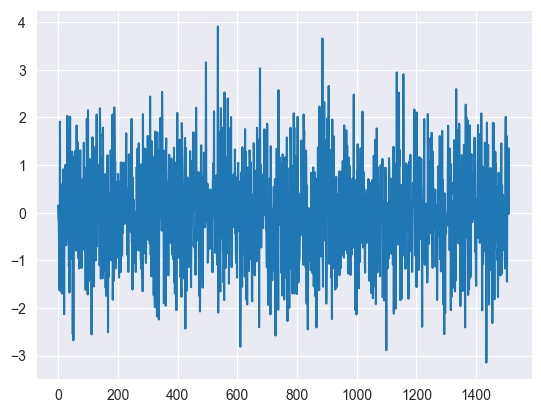

In [28]:
plt.plot(data)

In [31]:
data = np.cumsum((np.random.normal(size = len(df))))

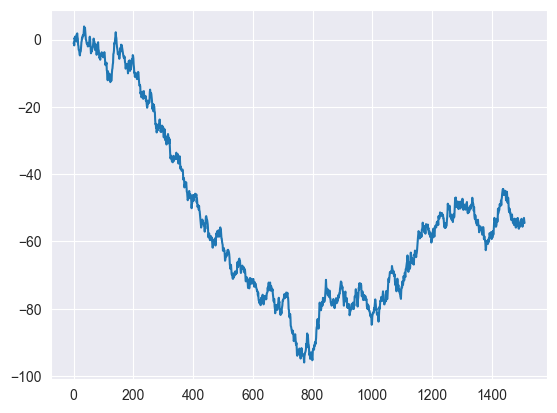

In [32]:
plt.plot(data)

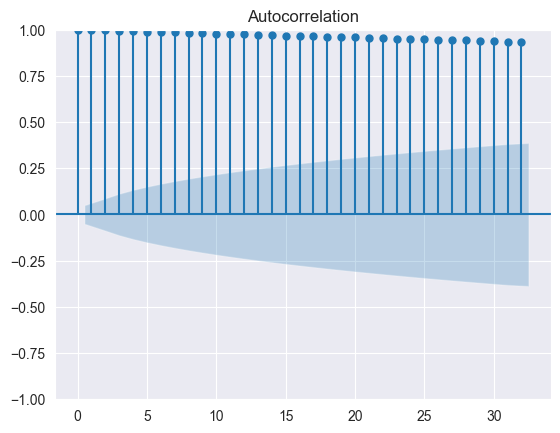

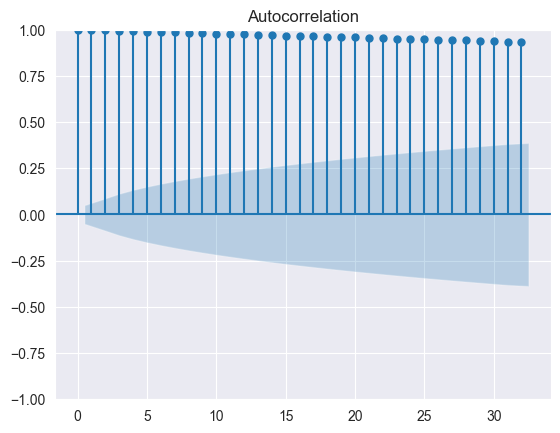

In [33]:
plot_acf(data)

In [36]:
arr = [0]
for i in range(1,1000):
    arr.append(arr[-1] + i)
    
arr = np.array(arr)

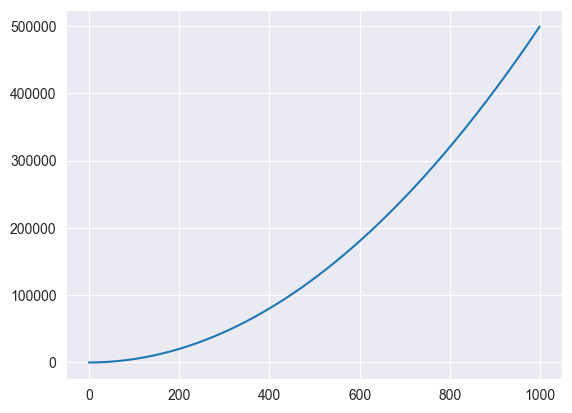

In [37]:
plt.plot(arr)

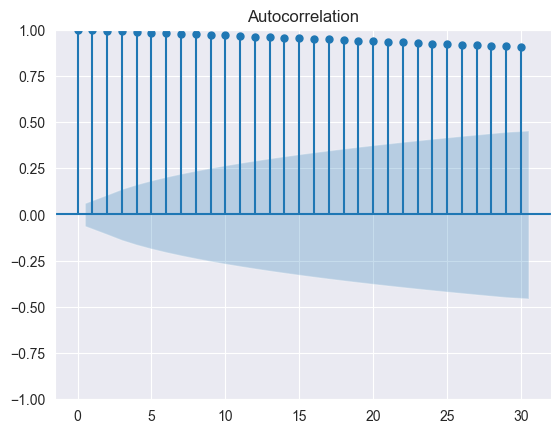

In [40]:
plot_acf(arr)
plt.show()

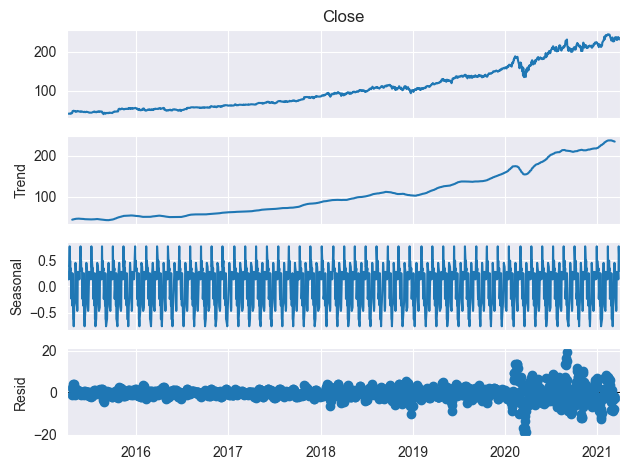

In [41]:
decomposition = seasonal_decompose(df['Close'],model = 'additive',period = 30)
decomposition.plot()
plt.show()

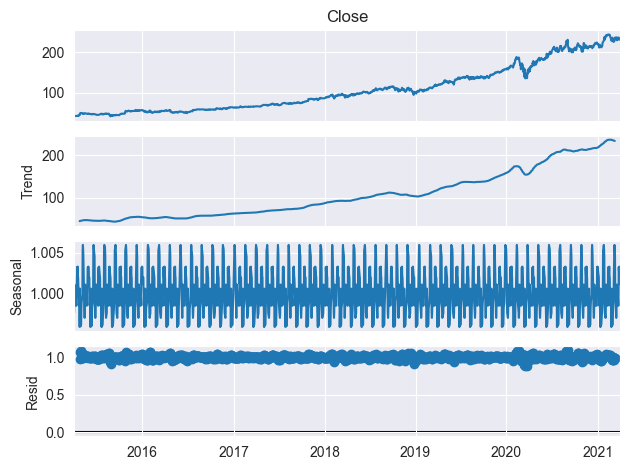

In [42]:
decomposition = seasonal_decompose(df['Close'],model = 'multiplicative',period = 30)
decomposition.plot()
plt.show()

In [43]:
result = adfuller(df['Close'],autolag = 'AIC')
print(result[0]," ",result[1])

1.7371362899271037   0.9982158366942122


In [47]:
res_kpss = kpss(df['Close'],regression = 'ct')
print(res_kpss[0]," ",res_kpss[1])

1.2451608197166197   0.01


/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_15765/3813127632.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  res_kpss = kpss(df['Close'],regression = 'ct')


In [48]:
ts = df['Close'].diff().dropna()

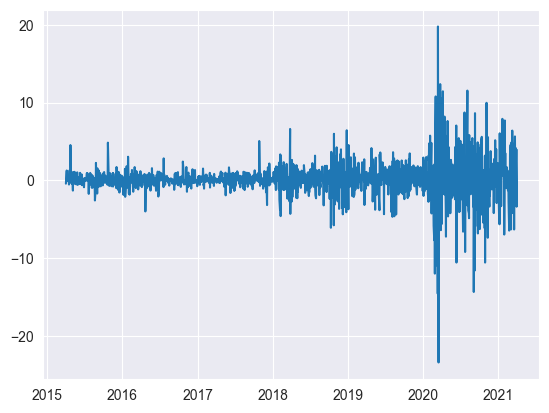

In [49]:
plt.plot(ts)
plt.show()

In [50]:
adfuller(ts,autolag='AIC')

(-10.038331065146357,
 1.5195939917535664e-17,
 24,
 1485,
 {'1%': -3.43476120520139,
  '5%': -2.863488262178673,
  '10%': -2.567807233388883},
 6597.0173474503645)

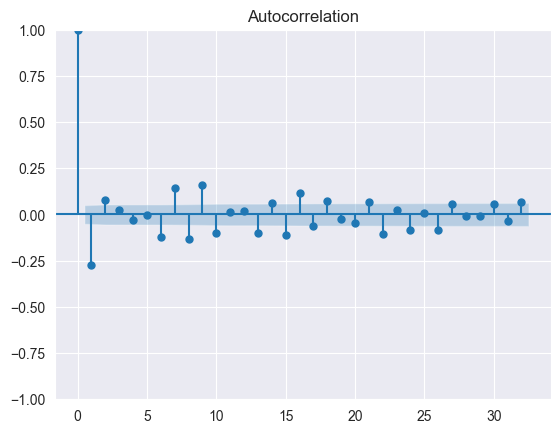

In [51]:
plot_acf(ts)
plt.show()

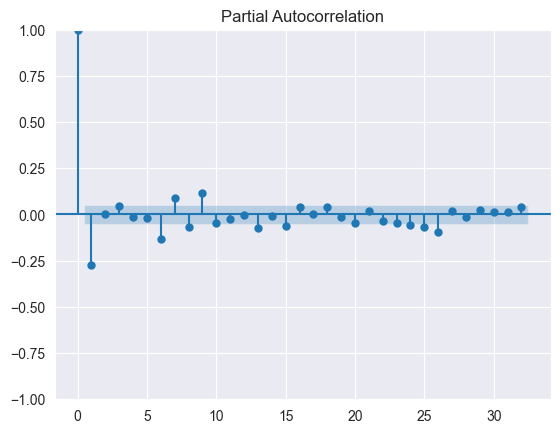

In [52]:
plot_pacf(ts)
plt.show()

we can infer that q-val is 3 and p-val is 2 from the auto-correlation and partial auto-correlation plots

In [53]:
model = ARIMA(ts,order = (2,0,3))
model_arima = model.fit()

/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters 

In [55]:
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1510
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -3367.593
Date:                Sat, 26 Oct 2024   AIC                           6749.186
Time:                        14:52:31   BIC                           6786.425
Sample:                             0   HQIC                          6763.054
                               - 1510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1289      0.046      2.811      0.005       0.039       0.219
ar.L1          1.1320      0.044     25.470      0.000       1.045       1.219
ar.L2         -0.7289      0.052    -13.971      0.0

In [58]:
model_arima.forecast(10)

/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/surya/anaconda3/envs/Tf-metal/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1510   -0.719932
1511    0.498086
1512    0.392108
1513    0.157777
1514   -0.030244
1515   -0.072278
1516    0.017194
1517    0.149120
1518    0.233247
1519    0.232315
Name: predicted_mean, dtype: float64

In [59]:
ts

Date
2015-04-02 16:00:00   -0.43
2015-04-06 16:00:00    1.26
2015-04-07 16:00:00   -0.02
2015-04-08 16:00:00   -0.11
2015-04-09 16:00:00    0.06
                       ... 
2021-03-25 16:00:00   -3.12
2021-03-26 16:00:00    4.14
2021-03-29 16:00:00   -1.24
2021-03-30 16:00:00   -3.39
2021-03-31 16:00:00    3.92
Name: Close, Length: 1510, dtype: float64

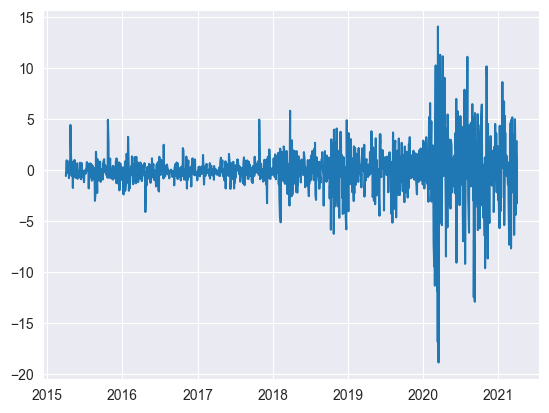

In [60]:
plt.plot(model_arima.resid)
plt.show()